In [1]:
import zipfile
%matplotlib inline
import numpy as np
import ast
import json
import urllib
import urllib2
from cStringIO import StringIO
import pandas as pd
import requests
import os
import geopandas as gpd
import matplotlib.pylab as pl
from fiona.crs import from_epsg
import fiona
import matplotlib.pylab as pl
from matplotlib import colors
import shapely
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
fileUrl = 'http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip'
filebuffer = urllib.urlretrieve(fileUrl, filename='TM_WORLD_BORDERS_SIMPL-0.3.zip')
os.system("unzip " + "TM_WORLD_BORDERS_SIMPL-0.3.zip")

In [5]:
fname = str(zipfile.ZipFile("TM_WORLD_BORDERS-0.3.zip").namelist()[3])
print fname
world = gpd.GeoDataFrame.from_file(fname)




TM_WORLD_BORDERS-0.3.shp


In [7]:
print world.crs
world.head()


{'init': u'epsg:4326'}


,AREA,FIPS,ISO2,ISO3,LAT,LON,NAME,POP2005,REGION,SUBREGION,UN,geometry
0,44,AC,AG,ATG,17.078,-61.783,Antigua and Barbuda,83039,19,29,28,"(POLYGON ((-61.686668 17.02444100000014, -61.7..."
1,238174,AG,DZ,DZA,28.163,2.632,Algeria,32854159,2,15,12,"POLYGON ((2.96361 36.802216, 2.981389 36.80693..."
2,8260,AJ,AZ,AZE,40.430,47.395,Azerbaijan,8352021,142,145,31,(POLYGON ((45.08332100000001 39.76804400000015...
3,2740,AL,AL,ALB,41.143,20.068,Albania,3153731,150,39,8,"POLYGON ((19.436214 41.021065, 19.450554 41.05..."
4,2820,AM,AM,ARM,40.534,44.563,Armenia,3017661,142,145,51,(POLYGON ((45.57305100000014 40.63248800000008...


!ls TM_WORLD_BORDERS_SIMPL-0.3/TM_WORLD_BORDERS-0.3.shp


In [ ]:
f, ax = pl.subplots(figsize=(55,15))

USstates.plot(c = 'k', linewidth = .5, ax = ax,  color= 'Green', label = 'parks')
Wolrdshape.plot(c = 'k', linewidth = .5, ax = ax,  color= 'Blue', label = 'parks')
pl.axis('off')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("world", size=20)

In [10]:
world[world.NAME=='Mexico'].geometry.centroid

119    POINT (-102.5349938982893 23.95093184762322)
dtype: object

AttributeError: 'GeoSeries' object has no attribute 'x'

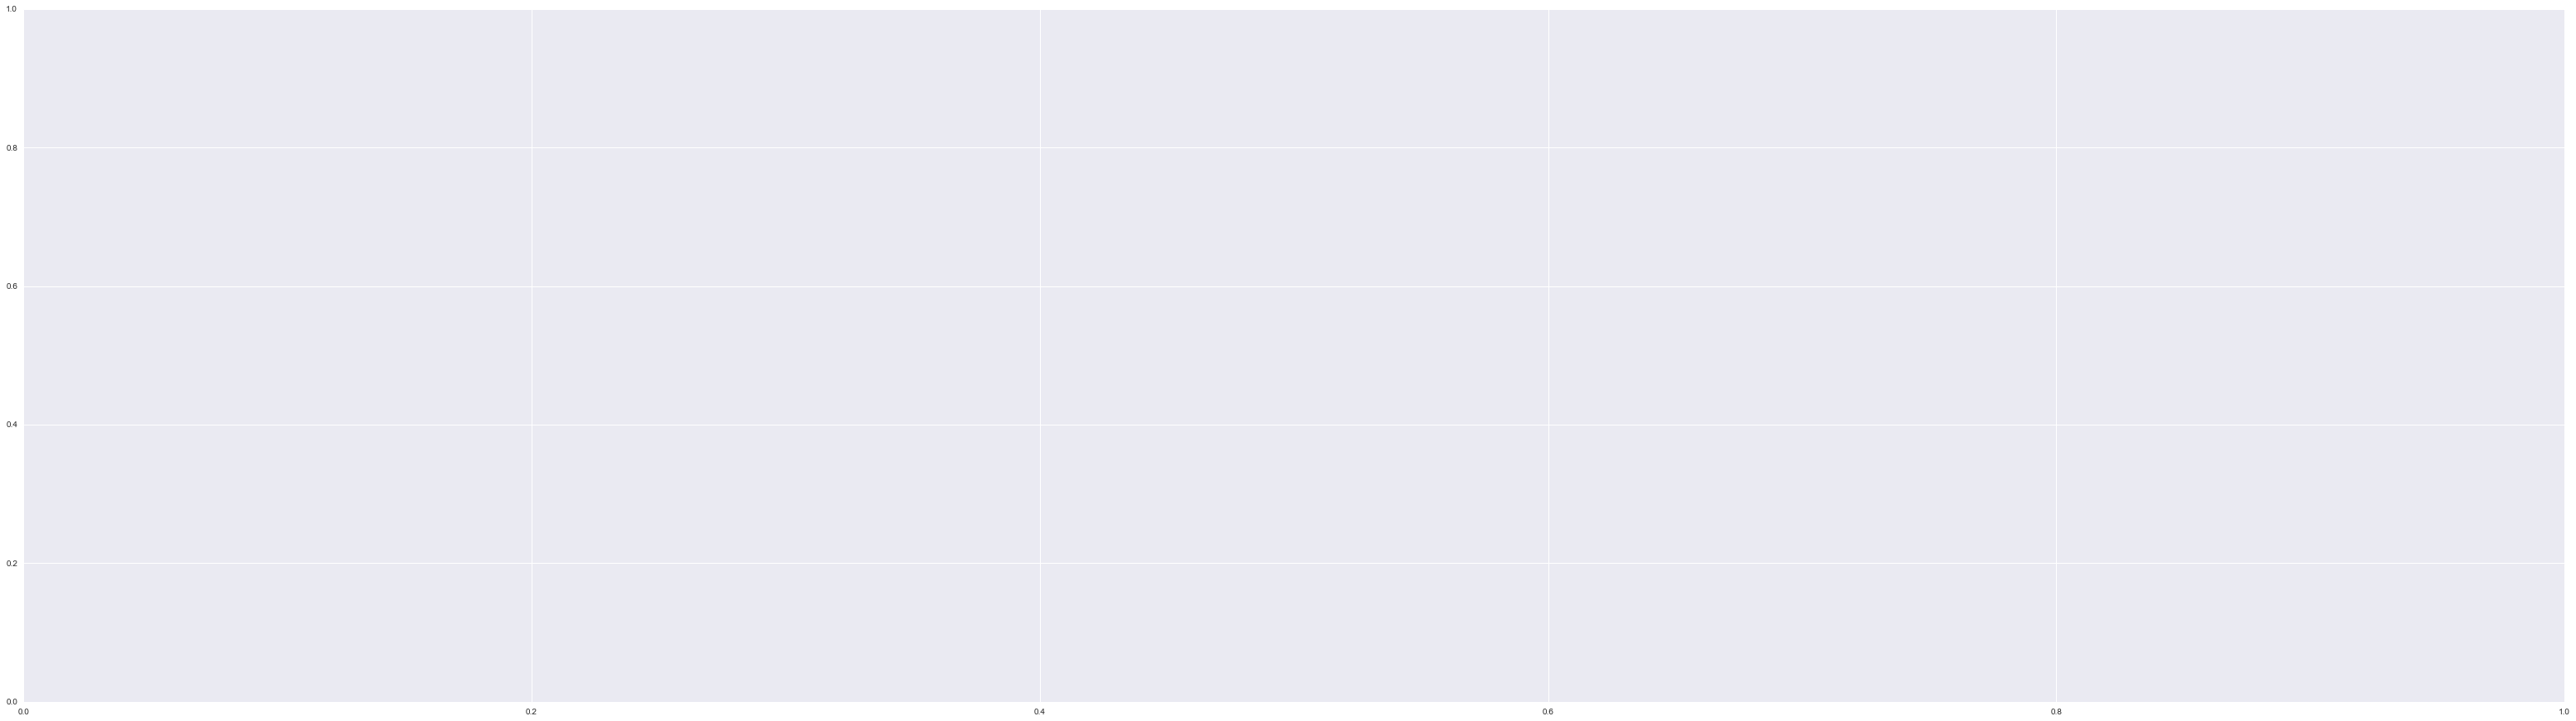

In [20]:
f, ax = pl.subplots(figsize=(55,15))


#world[world.NAME=='Mexico'].plot(c = 'k', linewidth = .5, ax = ax,  color= 'Blue', label = 'parks')
pl.scatter(world[world.NAME=='Mexico'].geometry.centroid.x, world[world.NAME=='Mexico'].geometry.centroid.y, s = 100, color = 'r', alpha = 0.8, label = 'Facilities')


pl.axis('off')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("world", size=20)

In [50]:
world[world.NAME=='Mexico'].geometry.centroid.map(getXY)

119    (-102.534993898, 23.9509318476)
dtype: object

In [77]:
x = world[world.NAME=='Mexico'].geometry.centroid.values
x[0].x

-102.53499389828929

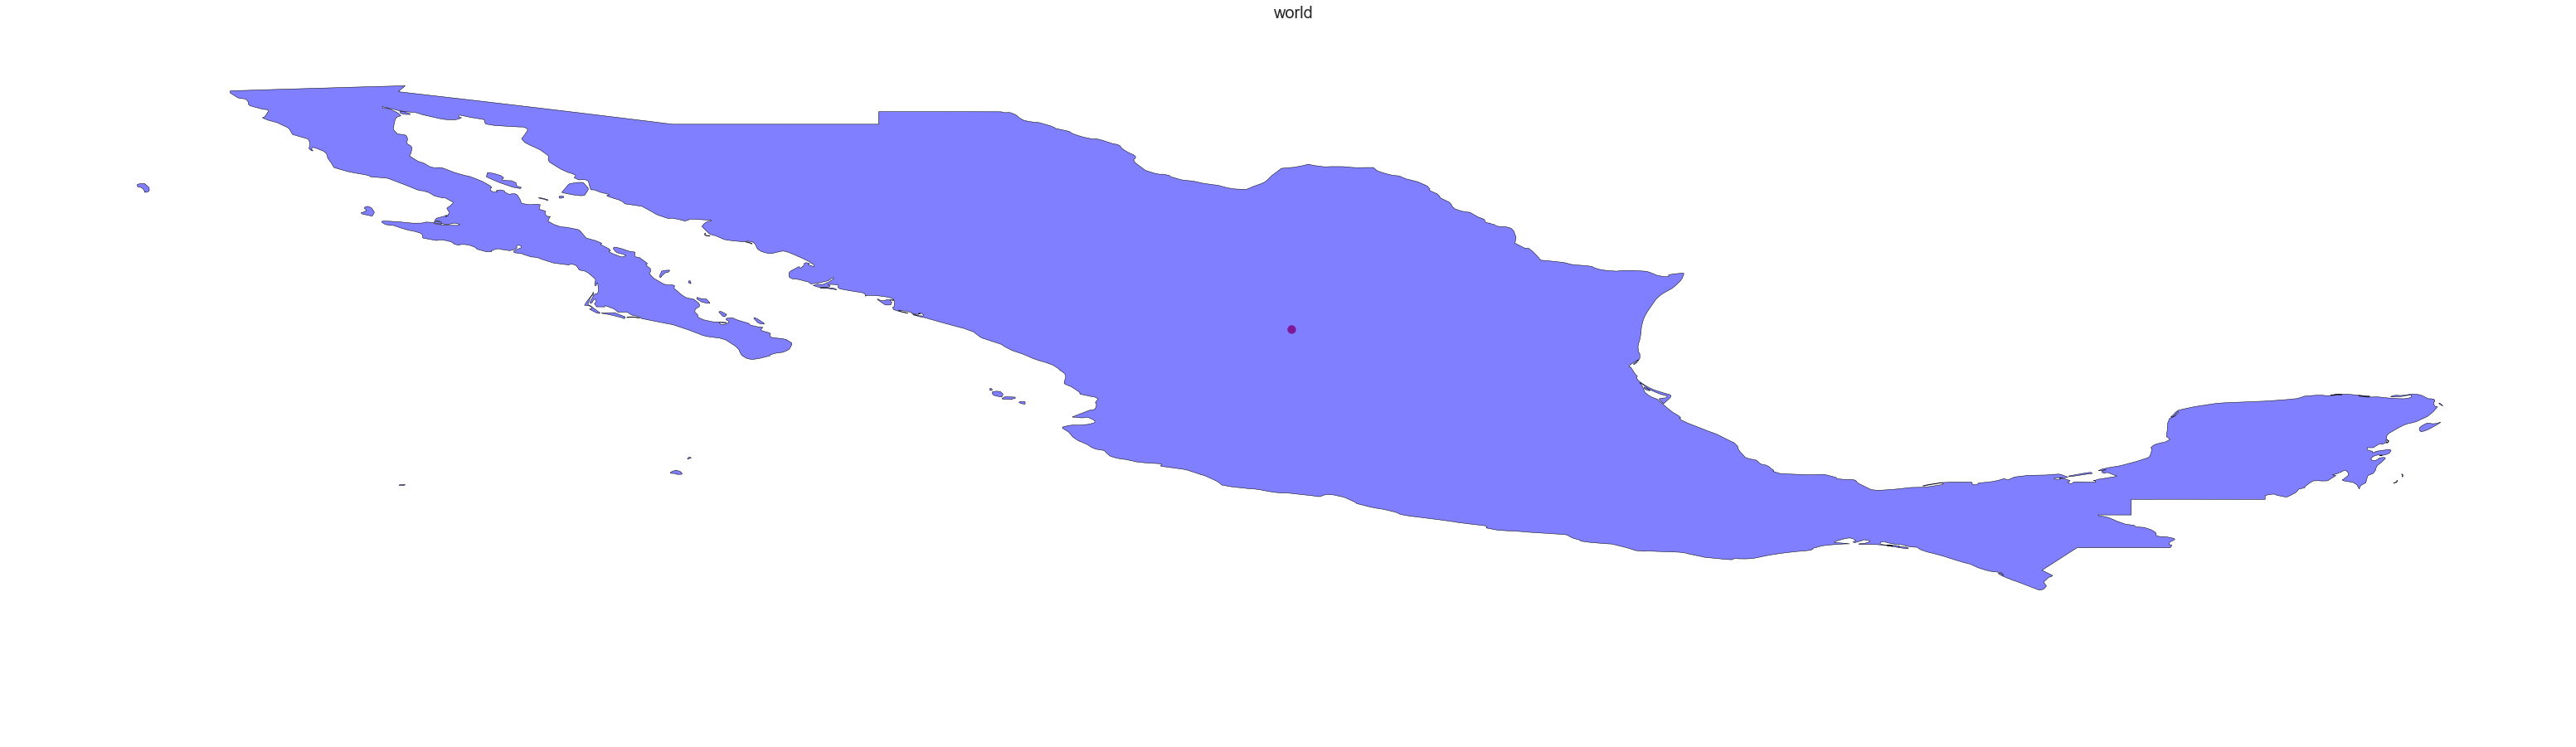

In [79]:
f, ax = pl.subplots(figsize=(55,15))


world[world.NAME=='Mexico'].plot(c = 'k', linewidth = .5, ax = ax,  color= 'Blue', label = 'parks')
pl.scatter(x[0].x, x[0].y, s = 100, color = 'r', alpha = 0.8, label = 'Facilities')
#x[0].plot(c = 'k', linewidth = .5, ax = ax,  color= 'Blue', label = 'parks')

pl.axis('off')
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
pl.title("world", size=20)

In [103]:
undata = gpd.GeoDataFrame.from_csv('undatarefugges.csv')
undata.reset_index(inplace=True)

In [104]:
undata = undata.iloc[::,:6:]

In [105]:
 undata.Year.unique()

array([ 2013.,  2012.,  2011.,  2010.,  2009.,  2008.,  2007.,  2006.,
        2005.,  2004.,  2003.,  2002.,  2001.,  2000.,  1999.,  1998.,
        1997.,  1996.,  1995.,  1994.,  1993.,  1992.,  1991.,  1990.,
        1989.,  1988.,  1987.,  1986.,  1985.,  1984.,  1983.,  1982.,
        1981.,  1980.,  1979.,  1978.,  1977.,  1976.,  1975.,    nan])

In [92]:
undata.head()

,Country or territory of asylum or residence,Country or territory of origin,Year,Refugees<sup>*</sup>,Refugees assisted by UNHCR,Total refugees and people in refugee-like situations<sup>**</sup>


In [3]:
asyseekundata = gpd.GeoDataFrame.from_csv('unhcr_asylum_seekers_all_data.csv')
asyseekundata.reset_index(inplace=True)
asyseekundata.head()

C:\Users\ferna\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2825: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,pending start-year,of which UNHCR-assisted,Applied during year,recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total persons pending end-year
0,2000-01-01,Zimbabwe,Afghanistan,G / FI,0,0,5,5,0,0,0,5,0
1,2000-01-01,South Africa,Afghanistan,G / FI,8,1,0,0,0,0,0,NaN,8
2,2000-01-01,Uzbekistan,Afghanistan,U / FI,265,265,2156,747,0,112,327,1186,1235
3,2000-01-01,United States of America,Afghanistan,G / IN,193,0,218,182,0,51,40,273,150
4,2000-01-01,United States of America,Afghanistan,G / EO,196,0,225,151,0,31,68,250,171


In [4]:
asyseekundata.replace('*', np.NaN)

,Year,Country / territory of asylum/residence,Origin,RSD procedure type / level,pending start-year,of which UNHCR-assisted,Applied during year,recognized,decisions_other,Rejected,Otherwise closed,Total decisions,Total persons pending end-year
0,2000-01-01,Zimbabwe,Afghanistan,G / FI,0,0,5,5,0,0,0,5,0
1,2000-01-01,South Africa,Afghanistan,G / FI,8,1,0,0,0,0,0,NaN,8
2,2000-01-01,Uzbekistan,Afghanistan,U / FI,265,265,2156,747,0,112,327,1186,1235
3,2000-01-01,United States of America,Afghanistan,G / IN,193,0,218,182,0,51,40,273,150
4,2000-01-01,United States of America,Afghanistan,G / EO,196,0,225,151,0,31,68,250,171
5,2000-01-01,Ukraine,Afghanistan,G / FI,40,0,662,275,0,412,0,687,23
6,2000-01-01,Turkey,Afghanistan,U / FI,67,67,81,29,0,24,49,102,46
7,2000-01-01,Turkmenistan,Afghanistan,U / FI,416,416,169,126,0,121,210,457,128
8,2000-01-01,Tajikistan,Afghanistan,G / FI,2172,30,165,112,0,0,1992,2104,233
9,2000-01-01,Thailand,Afghanistan,U / AR,0,0,2,1,0,1,0,2,0


In [5]:
asyseekundata[' pending start-year'] = pd.to_numeric(asyseekundata[' pending start-year'], errors='coerce')

In [6]:
asyseekundata['recognized'] = pd.to_numeric(asyseekundata['recognized'], errors='coerce')

In [7]:
origint = asyseekundata.groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origint.reset_index(inplace=True)
origint.columns = ['Origin','TotalReq', 'TotalRecog']
origint.head()

,Origin,TotalReq,TotalRecog
0,Various/Unknown,3297232.0,85635.0
1,El Salvador,1021970.0,6607.0
2,Guatemala,647281.0,7388.0
3,Dem. Rep. of the Congo,600225.0,202335.0
4,Afghanistan,471133.0,194520.0


In [8]:
origing = asyseekundata[asyseekundata.Year=='2000-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2000Req', '2000Recog']

In [9]:
origint = pd.merge(origint,origing, on='Origin')
origint.head()

,Origin,TotalReq,TotalRecog,2000Req,2000Recog
0,Various/Unknown,3297232.0,85635.0,189793.0,8146.0
1,El Salvador,1021970.0,6607.0,183474.0,332.0
2,Guatemala,647281.0,7388.0,104839.0,454.0
3,Dem. Rep. of the Congo,600225.0,202335.0,8460.0,4157.0
4,Afghanistan,471133.0,194520.0,9602.0,90334.0


In [10]:
origing = asyseekundata[asyseekundata.Year=='2001-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2001Req', '2001Recog']

In [11]:
origint = pd.merge(origint,origing, on='Origin')

In [12]:
origing = asyseekundata[asyseekundata.Year=='2002-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2002Req', '2002Recog']

In [13]:
origint = pd.merge(origint,origing, on='Origin')

In [14]:
origing = asyseekundata[asyseekundata.Year=='2003-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2003Req', '2003Recog']

In [15]:
origint = pd.merge(origint,origing, on='Origin')

In [16]:
origing = asyseekundata[asyseekundata.Year=='2004-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2004Req', '2004Recog']

In [17]:
origint = pd.merge(origint,origing, on='Origin')

In [18]:
origing = asyseekundata[asyseekundata.Year=='2005-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2005Req', '2005Recog']

In [19]:
origint = pd.merge(origint,origing, on='Origin')

In [20]:
origing = asyseekundata[asyseekundata.Year=='2006-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2006Req', '2006Recog']

In [21]:
origint = pd.merge(origint,origing, on='Origin')

In [22]:
origing = asyseekundata[asyseekundata.Year=='2007-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2007Req', '2007Recog']

In [23]:
origint = pd.merge(origint,origing, on='Origin')

In [24]:
origing = asyseekundata[asyseekundata.Year=='2008-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2008Req', '2008Recog']

In [25]:
origint = pd.merge(origint,origing, on='Origin')

In [26]:
origing = asyseekundata[asyseekundata.Year=='2009-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2009Req', '2009Recog']

In [27]:
origint = pd.merge(origint,origing, on='Origin')

In [28]:
origing = asyseekundata[asyseekundata.Year=='2010-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2010Req', '2010Recog']

In [29]:
origint = pd.merge(origint,origing, on='Origin')

In [30]:
origing = asyseekundata[asyseekundata.Year=='2011-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2011Req', '2011Recog']

In [31]:
origint = pd.merge(origint,origing, on='Origin')

In [32]:
origing = asyseekundata[asyseekundata.Year=='2012-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2012Req', '2012Recog']

In [33]:
origint = pd.merge(origint,origing, on='Origin')

In [34]:
origing = asyseekundata[asyseekundata.Year=='2013-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2013Req', '2013Recog']

In [35]:
origint = pd.merge(origint,origing, on='Origin')

In [36]:
origing = asyseekundata[asyseekundata.Year=='2014-01-01'].groupby('Origin').sum().sort_values(' pending start-year', ascending=False)
origing.reset_index(inplace=True)
origing.columns = ['Origin','2014Req', '2014Recog']

In [37]:
origint = pd.merge(origint,origing, on='Origin')

In [38]:
origint.head()

,Origin,TotalReq,TotalRecog,2000Req,2000Recog,2001Req,2001Recog,2002Req,2002Recog,2003Req,...,2010Req,2010Recog,2011Req,2011Recog,2012Req,2012Recog,2013Req,2013Recog,2014Req,2014Recog
0,Various/Unknown,3297232.0,85635.0,189793.0,8146.0,151617.0,13370.0,139207.0,4974.0,260012.0,...,263157.0,5929.0,247784.0,1432.0,274705.0,2575.0,215681.0,1082.0,319654.0,8453.0
1,El Salvador,1021970.0,6607.0,183474.0,332.0,176206.0,234.0,164888.0,191.0,151661.0,...,9855.0,484.0,1548.0,576.0,1544.0,627.0,1678.0,581.0,13106.0,1102.0
2,Guatemala,647281.0,7388.0,104839.0,454.0,101741.0,325.0,99450.0,276.0,96111.0,...,9191.0,493.0,1036.0,674.0,1106.0,599.0,1343.0,427.0,11661.0,868.0
3,Dem. Rep. of the Congo,600225.0,202335.0,8460.0,4157.0,20198.0,13408.0,29494.0,8641.0,44428.0,...,31067.0,13964.0,43967.0,11648.0,53982.0,29555.0,58312.0,34858.0,73529.0,27000.0
4,Afghanistan,471133.0,194520.0,9602.0,90334.0,28076.0,18471.0,30743.0,3618.0,42202.0,...,34908.0,8466.0,38555.0,9361.0,38903.0,12871.0,61529.0,13195.0,68512.0,11891.0


In [39]:
toplodb = origint
toplodb.set_index('Origin',inplace=True)

In [40]:
toplodb.T.head()

Origin,Various/Unknown,El Salvador,Guatemala,Dem. Rep. of the Congo,Afghanistan,Iraq,Colombia,Ethiopia,Serbia and Kosovo (S/RES/1244 (1999)),Somalia,...,Australia,New Zealand,Maldives,Cyprus,Austria,Denmark,Finland,Samoa,"China, Macao SAR",Switzerland
TotalReq,3297232.0,1021970.0,647281.0,600225.0,471133.0,456348.0,440022.0,393303.0,345916.0,308384.0,...,110.0,94.0,90.0,78.0,75.0,63.0,53.0,49.0,45.0,42.0
TotalRecog,85635.0,6607.0,7388.0,202335.0,194520.0,185213.0,106567.0,80781.0,28668.0,199216.0,...,11.0,6.0,38.0,4.0,6.0,10.0,6.0,2.0,3.0,8.0
2000Req,189793.0,183474.0,104839.0,8460.0,9602.0,18115.0,2273.0,9126.0,50001.0,7300.0,...,5.0,5.0,5.0,3.0,0.0,5.0,7.0,2.0,2.0,4.0
2000Recog,8146.0,332.0,454.0,4157.0,90334.0,15731.0,3245.0,4046.0,2255.0,9055.0,...,3.0,1.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0
2001Req,151617.0,176206.0,101741.0,20198.0,28076.0,40105.0,5413.0,14699.0,49693.0,11807.0,...,6.0,2.0,1.0,7.0,5.0,4.0,5.0,2.0,0.0,1.0


In [41]:
toplodb.T.iloc[2::2,1:15:].head()

Origin,El Salvador,Guatemala,Dem. Rep. of the Congo,Afghanistan,Iraq,Colombia,Ethiopia,Serbia and Kosovo (S/RES/1244 (1999)),Somalia,China,Sudan,Myanmar,Mexico,Iran (Islamic Rep. of)
2000Req,183474.0,104839.0,8460.0,9602.0,18115.0,2273.0,9126.0,50001.0,7300.0,14526.0,8456.0,1170.0,12372.0,7778.0
2001Req,176206.0,101741.0,20198.0,28076.0,40105.0,5413.0,14699.0,49693.0,11807.0,15425.0,19078.0,1056.0,13019.0,20650.0
2002Req,164888.0,99450.0,29494.0,30743.0,35245.0,13291.0,11955.0,50920.0,16561.0,20225.0,20139.0,1135.0,22309.0,14686.0
2003Req,151661.0,96111.0,44428.0,42202.0,29680.0,21911.0,8692.0,18247.0,13938.0,24519.0,13380.0,2051.0,30905.0,13360.0
2004Req,128388.0,88273.0,51921.0,25967.0,32134.0,23129.0,10645.0,14302.0,14745.0,21349.0,6667.0,11196.0,26623.0,11377.0


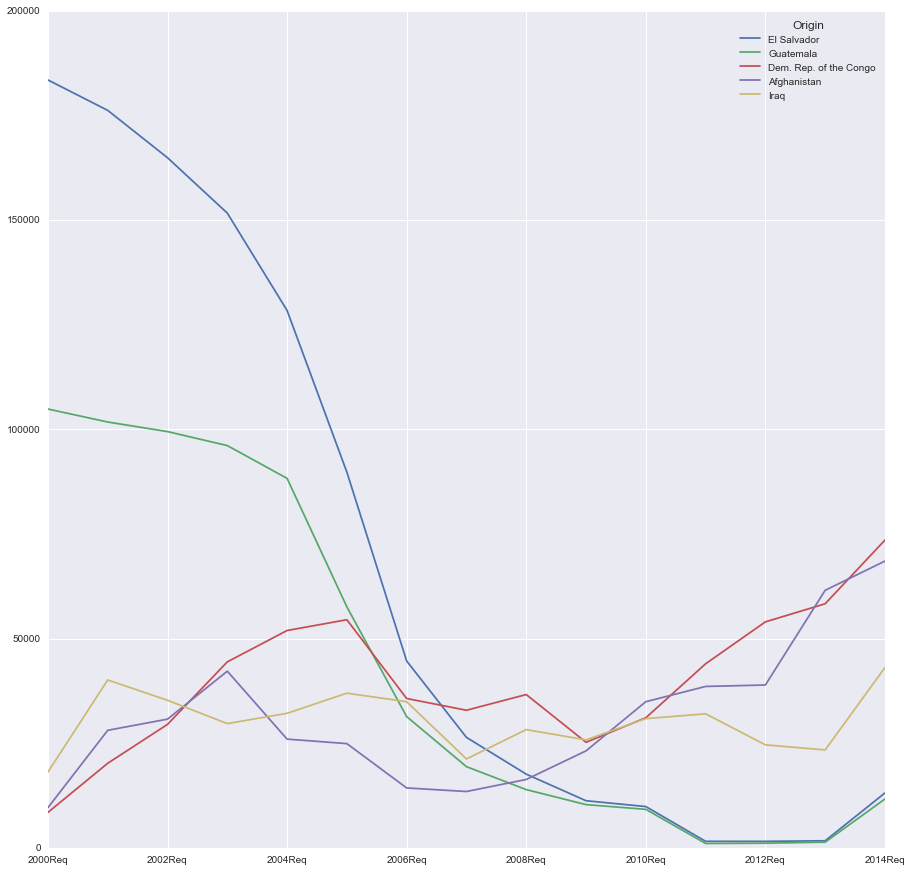

In [42]:
f, ax = pl.subplots(figsize=(15,15))
toplodb.T.iloc[2::2,1:6:].plot(ax=ax)

pl.show()

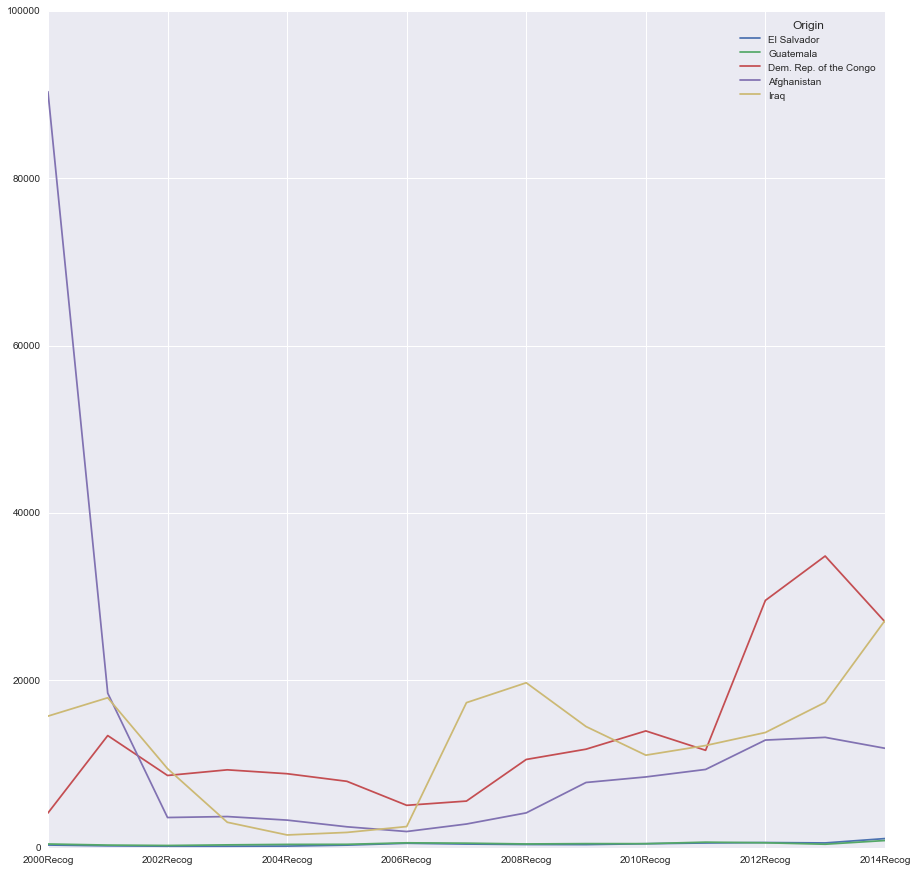

In [43]:
f, ax = pl.subplots(figsize=(15,15))
toplodb.T.iloc[3::2,1:6:].plot(ax=ax)

pl.show()

In [131]:
asyseekundata.groupby('Origin').

In [295]:
def cluster_plot(df, n_clust, cluster_algorithm = 'KMeans'):
    '''clusters dataframe according to kmeans and plots
    keyword arguments: 
    df = dataframe
    n_clust = number of clusters
    cluster algorithm: picks clustering algorithm with default of kmeans, 
    other option is AggClust for AgglomerativeClustering
    '''
    if cluster_algorithm == 'KMeans':
        clusters = KMeans(n_clust, random_state = 21).fit(df)
        cluster_labels = clusters.labels_ 
        cluster_centers = clusters.cluster_centers_
        name = 'KMeans'
        
    elif cluster_algorithm == 'AggClust':
        clusters = AgglomerativeClustering(n_clust).fit(df)
        cluster_labels = AgglomerativeClustering(n_clust).fit_predict(df) 
        name = 'Agglomerative Clustering'
        cluster_centers = []
        for i in range(n_clust): 
            cluster_centers.append(df[cluster_labels == i].mean(axis = 0))
        cluster_centers = np.array(cluster_centers)

    
    else: 
        print ('not an algorithm type')
        
    
    ncol = int(round(n_clust / 2.0))
    fig, axs = pl.subplots(ncol, 2, figsize=(20,10))
    axs = axs.ravel()

    fig.subplots_adjust(hspace = .2, wspace=.2)

    fig.text(0.5, 0.04, 'Year', ha='center', fontsize = 20)
    fig.text(0.04, 0.5, 'Refugees (Absolute)', 
             va='center', rotation='vertical', fontsize = 20)

    pl.suptitle('{0} Clusters of Refugees ({1})'.format(str(n_clust), name),
                 fontsize = 25)

    for x in range(n_clust):
        axs[x].plot(columns, df[cluster_labels == x].T, alpha = .3, c = 'r')
        axs[x].set_title('Cluster No. ' + str(x), fontsize = 20)
        axs[x].plot(columns, cluster_centers[x], c = 'k', lw = 4, label = 'Cluster Center')

    pl.legend(bbox_to_anchor=(1.0, 1), loc=2, borderaxespad=.2, prop = {'size': 20})
    
    return df, cluster_labels


In [297]:
columns = [2000,
2001,
2002,
2003,
2004,
2005,
2006,
2007,
2008,
2009,
2010,
2011,
2012,
2013,
2014]


In [73]:
recivet = asyseekundata.groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
recivet.reset_index(inplace=True)
recivet.columns = ['Country','TotalReq', 'TotalRecog']
recivet.head()

,Country,TotalReq,TotalRecog
0,United States of America,2868429.0,332146.0
1,South Africa,2067017.0,75414.0
2,Germany,1151330.0,139988.0
3,Canada,566055.0,175286.0
4,France,531476.0,182692.0


In [74]:
reciveg = asyseekundata[asyseekundata.Year=='2000-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2000Req', '2000Recog']

In [75]:
recivet = pd.merge(recivet,reciveg, on='Country')

In [76]:
reciveg = asyseekundata[asyseekundata.Year=='2001-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2001Req', '2001Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [77]:
reciveg = asyseekundata[asyseekundata.Year=='2002-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2002Req', '2002Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [78]:
reciveg = asyseekundata[asyseekundata.Year=='2003-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2003Req', '2003Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [79]:
reciveg = asyseekundata[asyseekundata.Year=='2004-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2004Req', '2004Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [80]:
reciveg = asyseekundata[asyseekundata.Year=='2005-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2005Req', '2005Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [81]:
reciveg = asyseekundata[asyseekundata.Year=='2006-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2006Req', '2006Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [82]:
reciveg = asyseekundata[asyseekundata.Year=='2007-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2007Req', '2007Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [83]:
reciveg = asyseekundata[asyseekundata.Year=='2008-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2008Req', '2008Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [84]:
reciveg = asyseekundata[asyseekundata.Year=='2009-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2009Req', '2009Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [85]:
reciveg = asyseekundata[asyseekundata.Year=='2010-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2010Req', '2010Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [86]:
reciveg = asyseekundata[asyseekundata.Year=='2011-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2011Req', '2011Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [87]:
reciveg = asyseekundata[asyseekundata.Year=='2012-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2012Req', '2012Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [88]:
reciveg = asyseekundata[asyseekundata.Year=='2013-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2013Req', '2013Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [89]:
reciveg = asyseekundata[asyseekundata.Year=='2014-01-01'].groupby('Country / territory of asylum/residence').sum().sort_values(' pending start-year', ascending=False)
reciveg.reset_index(inplace=True)
reciveg.columns = ['Country','2014Req', '2014Recog']
recivet = pd.merge(recivet,reciveg, on='Country')

In [90]:
recivet.head()

,Country,TotalReq,TotalRecog,2000Req,2000Recog,2001Req,2001Recog,2002Req,2002Recog,2003Req,...,2010Req,2010Recog,2011Req,2011Recog,2012Req,2012Recog,2013Req,2013Recog,2014Req,2014Recog
0,United States of America,2868429.0,332146.0,399569.0,24000.0,384334.0,28304.0,395864.0,27909.0,395183.0,...,64241.0,19034.0,6285.0,23512.0,11857.0,25268.0,19063.0,21171.0,147206.0,21698.0
1,South Africa,2067017.0,75414.0,17325.0,0.0,24811.0,3597.0,4860.0,4786.0,52451.0,...,171702.0,10083.0,170702.0,6803.0,222645.0,7950.0,230442.0,7392.0,385410.0,9262.0
2,Germany,1151330.0,139988.0,53100.0,11446.0,70266.0,22719.0,85532.0,6509.0,164000.0,...,36400.0,7703.0,51991.0,7098.0,62686.0,8764.0,85560.0,10915.0,135401.0,33225.0
3,Canada,566055.0,175286.0,24726.0,13989.0,30175.0,13336.0,45804.0,15161.0,52761.0,...,61170.0,12305.0,51031.0,12983.0,41852.0,10294.0,32576.0,7817.0,22110.0,9835.0
4,France,531476.0,182692.0,0.0,7029.0,0.0,9655.0,34551.0,10713.0,34588.0,...,40517.0,12551.0,48576.0,8190.0,49240.0,7384.0,49885.0,9099.0,51641.0,16512.0


In [91]:
recivetdb = recivet
recivetdb.set_index('Country',inplace=True)

In [92]:
recivetdb.head()

,TotalReq,TotalRecog,2000Req,2000Recog,2001Req,2001Recog,2002Req,2002Recog,2003Req,2003Recog,...,2010Req,2010Recog,2011Req,2011Recog,2012Req,2012Recog,2013Req,2013Recog,2014Req,2014Recog
Country,,,,,,,,,,,,,,,,,,,,,
United States of America,2868429.0,332146.0,399569.0,24000.0,384334.0,28304.0,395864.0,27909.0,395183.0,22566.0,...,64241.0,19034.0,6285.0,23512.0,11857.0,25268.0,19063.0,21171.0,147206.0,21698.0
South Africa,2067017.0,75414.0,17325.0,0.0,24811.0,3597.0,4860.0,4786.0,52451.0,3280.0,...,171702.0,10083.0,170702.0,6803.0,222645.0,7950.0,230442.0,7392.0,385410.0,9262.0
Germany,1151330.0,139988.0,53100.0,11446.0,70266.0,22719.0,85532.0,6509.0,164000.0,3136.0,...,36400.0,7703.0,51991.0,7098.0,62686.0,8764.0,85560.0,10915.0,135401.0,33225.0
Canada,566055.0,175286.0,24726.0,13989.0,30175.0,13336.0,45804.0,15161.0,52761.0,17682.0,...,61170.0,12305.0,51031.0,12983.0,41852.0,10294.0,32576.0,7817.0,22110.0,9835.0
France,531476.0,182692.0,0.0,7029.0,0.0,9655.0,34551.0,10713.0,34588.0,13124.0,...,40517.0,12551.0,48576.0,8190.0,49240.0,7384.0,49885.0,9099.0,51641.0,16512.0


In [93]:
recivetdb.T.iloc[2::,:25:]

Country,United States of America,South Africa,Germany,Canada,France,United Kingdom,Austria,Netherlands,Greece,Switzerland,...,Turkey,Malaysia,Uganda,Burundi,Thailand,Australia,Somalia,Ireland,Venezuela (Bolivarian Republic of),Sudan
2000Req,399569.0,17325.0,53100.0,24726.0,0.0,119200.0,0.0,0.0,0.0,45409.0,...,5134.0,30.0,184.0,512.0,582.0,10320.0,0.0,9767.0,1.0,0.0
2000Recog,24000.0,0.0,11446.0,13989.0,7029.0,14330.0,1002.0,1808.0,222.0,2683.0,...,2716.0,111.0,366.0,0.0,594.0,4607.0,6.0,606.0,18.0,1.0
2001Req,384334.0,24811.0,70266.0,30175.0,0.0,88600.0,9945.0,84467.0,2379.0,27469.0,...,5209.0,24.0,2473.0,5999.0,361.0,10896.0,10.0,12048.0,101.0,3200.0
2001Recog,28304.0,3597.0,22719.0,13336.0,9655.0,21590.0,1152.0,888.0,147.0,3431.0,...,2869.0,105.0,3237.0,13.0,650.0,4092.0,39.0,934.0,0.0,293.0
2002Req,395864.0,4860.0,85532.0,45804.0,34551.0,42200.0,15187.0,78551.0,6249.0,25654.0,...,4176.0,252.0,627.0,7994.0,343.0,11583.0,260.0,10910.0,311.0,0.0
2002Recog,27909.0,4786.0,6509.0,15161.0,10713.0,23905.0,1073.0,816.0,36.0,2987.0,...,2885.0,246.0,1788.0,12.0,558.0,1718.0,42.0,1990.0,0.0,2243.0
2003Req,395183.0,52451.0,164000.0,52761.0,34588.0,41300.0,29494.0,58159.0,1805.0,27955.0,...,2591.0,1571.0,544.0,8777.0,1050.0,7291.0,215.0,7424.0,1019.0,23442.0
2003Recog,22566.0,3280.0,3136.0,17682.0,13124.0,21414.0,2084.0,1127.0,3.0,2641.0,...,2343.0,434.0,2028.0,17.0,756.0,615.0,74.0,1201.0,0.0,957.0
2004Req,351876.0,84085.0,128083.0,41575.0,22900.0,23900.0,33564.0,44672.0,7294.0,24630.0,...,3453.0,9195.0,726.0,10572.0,3319.0,3021.0,196.0,7410.0,2291.0,485.0
2004Recog,21148.0,1255.0,2067.0,16005.0,15815.0,13549.0,5208.0,784.0,11.0,2704.0,...,1690.0,1502.0,2402.0,1557.0,2937.0,1461.0,8.0,1167.0,217.0,7795.0


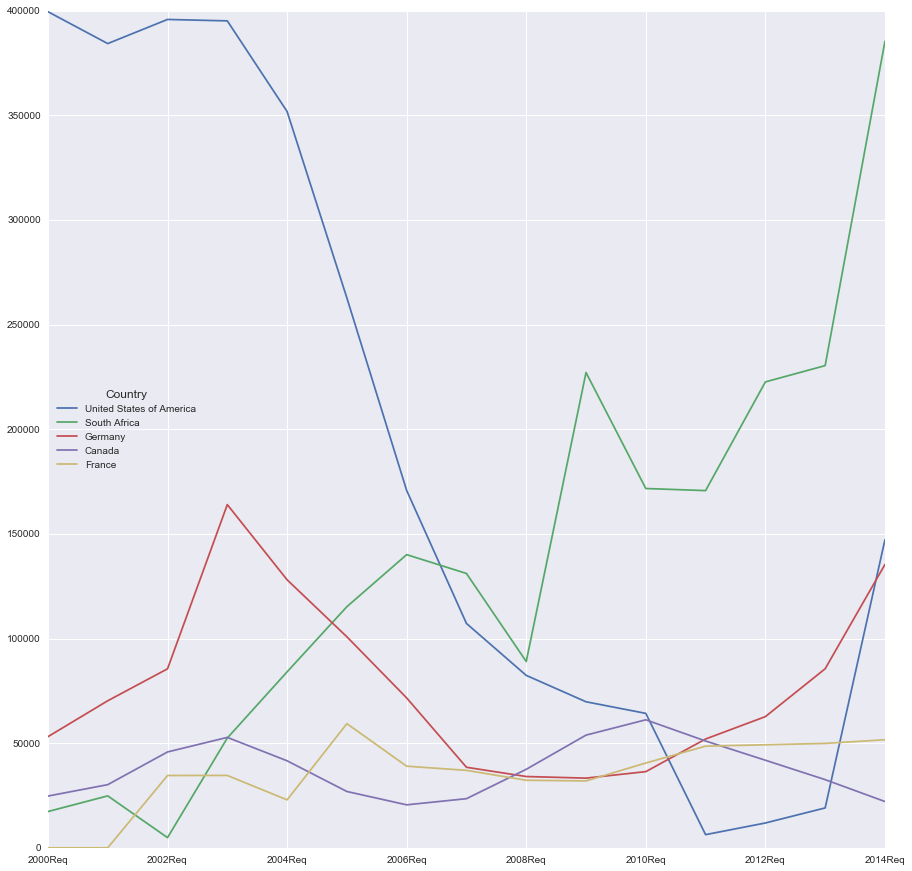

In [94]:
f, ax = pl.subplots(figsize=(15,15))
recivetdb.T.iloc[2::2,:5:].plot(ax=ax)

pl.show()

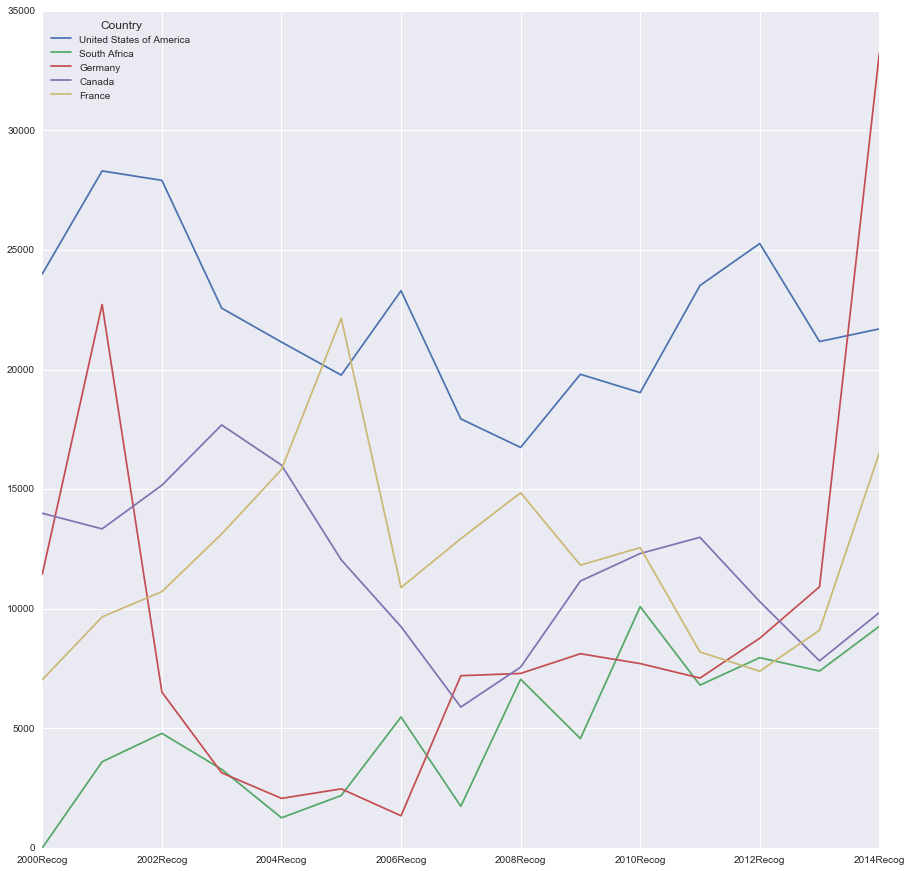

In [95]:
f, ax = pl.subplots(figsize=(15,15))
recivetdb.T.iloc[3::2,:5:].plot(ax=ax)

pl.show()

In [104]:
(recivetdb.T.iloc[3::2,:5:].as_matrix()/recivetdb.T.iloc[2::2,:5:].as_matrix())

array([[ 0.06006472,  0.        ,  0.21555556,  0.56576074,         inf],
       [ 0.07364428,  0.14497602,  0.32332849,  0.44195526,         inf],
       [ 0.07050149,  0.98477366,  0.07610017,  0.33099729,  0.31006338],
       [ 0.05710266,  0.06253456,  0.01912195,  0.33513391,  0.37943796],
       [ 0.06010072,  0.01492537,  0.01613797,  0.38496693,  0.69061135],
       [ 0.0752191 ,  0.01897174,  0.02443451,  0.4474672 ,  0.37315068],
       [ 0.13639345,  0.03904493,  0.01870881,  0.45027759,  0.27898569],
       [ 0.16727446,  0.01322584,  0.18696737,  0.25071359,  0.34932044],
       [ 0.20319687,  0.07917289,  0.21404456,  0.20139167,  0.46001549],
       [ 0.28374079,  0.02010787,  0.24373029,  0.20712323,  0.36996807],
       [ 0.29629053,  0.05872384,  0.21162088,  0.2011607 ,  0.30977121],
       [ 3.74097056,  0.03985308,  0.13652363,  0.25441398,  0.16860178],
       [ 2.13106182,  0.03570707,  0.13980793,  0.24596196,  0.14995938],
       [ 1.11058071,  0.03207749,  0.1

In [101]:
recivetdb.T.iloc[3::2,:5:].as_matrix()

array([[ 24000.,      0.,  11446.,  13989.,   7029.],
       [ 28304.,   3597.,  22719.,  13336.,   9655.],
       [ 27909.,   4786.,   6509.,  15161.,  10713.],
       [ 22566.,   3280.,   3136.,  17682.,  13124.],
       [ 21148.,   1255.,   2067.,  16005.,  15815.],
       [ 19766.,   2186.,   2464.,  12040.,  22145.],
       [ 23293.,   5470.,   1340.,   9246.,  10881.],
       [ 17935.,   1734.,   7196.,   5885.,  12928.],
       [ 16742.,   7049.,   7291.,   7554.,  14847.],
       [ 19800.,   4567.,   8115.,  11154.,  11819.],
       [ 19034.,  10083.,   7703.,  12305.,  12551.],
       [ 23512.,   6803.,   7098.,  12983.,   8190.],
       [ 25268.,   7950.,   8764.,  10294.,   7384.],
       [ 21171.,   7392.,  10915.,   7817.,   9099.],
       [ 21698.,   9262.,  33225.,   9835.,  16512.]])

In [105]:
recivetdb.T.iloc[3::2,:5:]

Country,United States of America,South Africa,Germany,Canada,France
2000Recog,24000.0,0.0,11446.0,13989.0,7029.0
2001Recog,28304.0,3597.0,22719.0,13336.0,9655.0
2002Recog,27909.0,4786.0,6509.0,15161.0,10713.0
2003Recog,22566.0,3280.0,3136.0,17682.0,13124.0
2004Recog,21148.0,1255.0,2067.0,16005.0,15815.0
2005Recog,19766.0,2186.0,2464.0,12040.0,22145.0
2006Recog,23293.0,5470.0,1340.0,9246.0,10881.0
2007Recog,17935.0,1734.0,7196.0,5885.0,12928.0
2008Recog,16742.0,7049.0,7291.0,7554.0,14847.0
2009Recog,19800.0,4567.0,8115.0,11154.0,11819.0


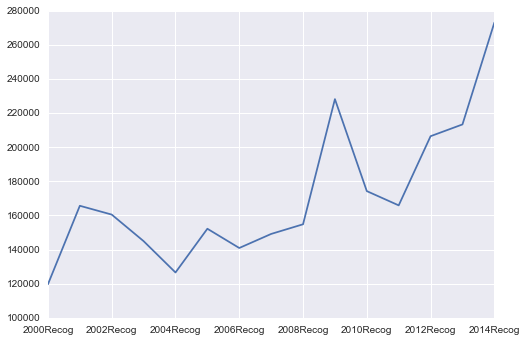

In [109]:
recivetdb.T.iloc[3::2,::].sum(axis=1).plot()

In [97]:
pd.concat((recivetdb.T.iloc[2::2,:5:],recivetdb.T.iloc[3::2,:5:]), axis=1, join='outer', join_axes=None, ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, copy=True)

Country,United States of America,South Africa,Germany,Canada,France,United States of America,South Africa,Germany,Canada,France
2000Recog,NaN,NaN,NaN,NaN,NaN,24000.0,0.0,11446.0,13989.0,7029.0
2000Req,399569.0,17325.0,53100.0,24726.0,0.0,NaN,NaN,NaN,NaN,NaN
2001Recog,NaN,NaN,NaN,NaN,NaN,28304.0,3597.0,22719.0,13336.0,9655.0
2001Req,384334.0,24811.0,70266.0,30175.0,0.0,NaN,NaN,NaN,NaN,NaN
2002Recog,NaN,NaN,NaN,NaN,NaN,27909.0,4786.0,6509.0,15161.0,10713.0
2002Req,395864.0,4860.0,85532.0,45804.0,34551.0,NaN,NaN,NaN,NaN,NaN
2003Recog,NaN,NaN,NaN,NaN,NaN,22566.0,3280.0,3136.0,17682.0,13124.0
2003Req,395183.0,52451.0,164000.0,52761.0,34588.0,NaN,NaN,NaN,NaN,NaN
2004Recog,NaN,NaN,NaN,NaN,NaN,21148.0,1255.0,2067.0,16005.0,15815.0
2004Req,351876.0,84085.0,128083.0,41575.0,22900.0,NaN,NaN,NaN,NaN,NaN


In [359]:
recivetdb.T.iloc[3::2,:25:] #/recivetdb.T.iloc[2::2,:25:])

Country,United States of America,South Africa,Germany,Canada,France,United Kingdom,Austria,Netherlands,Greece,Switzerland,...,Turkey,Malaysia,Uganda,Burundi,Thailand,Australia,Somalia,Ireland,Venezuela (Bolivarian Republic of),Sudan
2000Recog,24000.0,0.0,11446.0,13989.0,7029.0,14330.0,1002.0,1808.0,222.0,2683.0,...,2716.0,111.0,366.0,0.0,594.0,4607.0,6.0,606.0,18.0,1.0
2001Recog,28304.0,3597.0,22719.0,13336.0,9655.0,21590.0,1152.0,888.0,147.0,3431.0,...,2869.0,105.0,3237.0,13.0,650.0,4092.0,39.0,934.0,0.0,293.0
2002Recog,27909.0,4786.0,6509.0,15161.0,10713.0,23905.0,1073.0,816.0,36.0,2987.0,...,2885.0,246.0,1788.0,12.0,558.0,1718.0,42.0,1990.0,0.0,2243.0
2003Recog,22566.0,3280.0,3136.0,17682.0,13124.0,21414.0,2084.0,1127.0,3.0,2641.0,...,2343.0,434.0,2028.0,17.0,756.0,615.0,74.0,1201.0,0.0,957.0
2004Recog,21148.0,1255.0,2067.0,16005.0,15815.0,13549.0,5208.0,784.0,11.0,2704.0,...,1690.0,1502.0,2402.0,1557.0,2937.0,1461.0,8.0,1167.0,217.0,7795.0
2005Recog,19766.0,2186.0,2464.0,12040.0,22145.0,8665.0,4650.0,967.0,39.0,2929.0,...,1368.0,10935.0,0.0,788.0,719.0,1771.0,54.0,556.0,202.0,6008.0
2006Recog,23293.0,5470.0,1340.0,9246.0,10881.0,6267.0,4063.0,358.0,64.0,3278.0,...,1895.0,9313.0,3643.0,1100.0,543.0,1296.0,120.0,646.0,337.0,9791.0
2007Recog,17935.0,1734.0,7196.0,5885.0,12928.0,8236.0,5197.0,700.0,140.0,1561.0,...,7066.0,14156.0,3080.0,169.0,517.0,1699.0,205.0,579.0,228.0,11389.0
2008Recog,16742.0,7049.0,7291.0,7554.0,14847.0,7287.0,3753.0,515.0,358.0,2261.0,...,8646.0,11367.0,7602.0,3276.0,1267.0,1845.0,720.0,588.0,295.0,5887.0
2009Recog,19800.0,4567.0,8115.0,11154.0,11819.0,9739.0,3247.0,695.0,36.0,2622.0,...,6074.0,35524.0,13119.0,2632.0,7265.0,3441.0,100.0,363.0,215.0,10586.0
